In [1]:
import pandas as pd

In [17]:
data = pd.read_csv('datasets/bank/bank.csv', sep=';')

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [5]:
data.shape

(4119, 21)

In [18]:
data["y"] = (data["y"] == 'yes').astype(int)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [7]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0


In [8]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [2]:
import numpy as np

In [19]:
data["education"] = np.where(data["education"] == 'basic.4y', 'Basic', data["education"])
data["education"] = np.where(data["education"] == 'basic.6y', 'Basic', data["education"])
data["education"] = np.where(data["education"] == 'basic.9y', 'Basic', data["education"])
data["education"] = np.where(data["education"] == 'high.school', 'High School', data["education"])
data["education"] = np.where(data["education"] == 'professional.course', 'Professional Course', data["education"])
data["education"] = np.where(data["education"] == 'university.degree', 'University Degree', data["education"])
data["education"] = np.where(data["education"] == 'illiterate', 'Illiterate', data["education"])

data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'unknown', 'Illiterate'], dtype=object)

In [20]:
data["education"] = np.where(data["education"] == 'unknown', "Unknown", data["education"])
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [12]:
data["y"].value_counts()

y
0    3668
1     451
Name: count, dtype: int64

In [24]:
data.groupby("y").mean("age")

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [27]:
data.groupby("education").mean("age")

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set_theme()

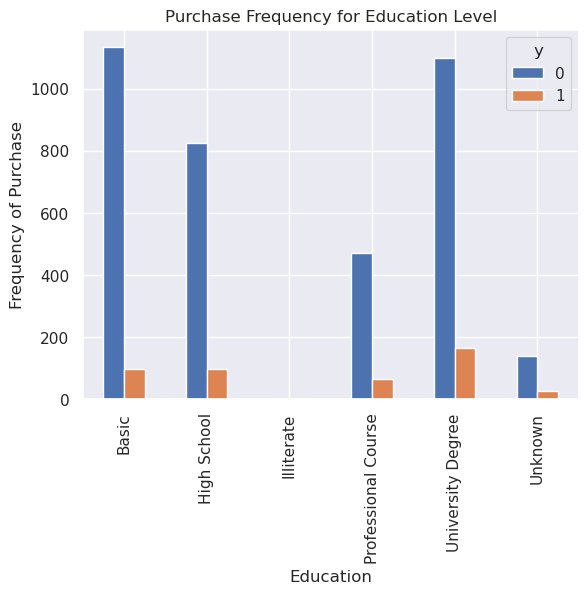

In [35]:
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Purchase Frequency for Education Level")
plt.xlabel("Education")
plt.ylabel("Frequency of Purchase")
plt.show()

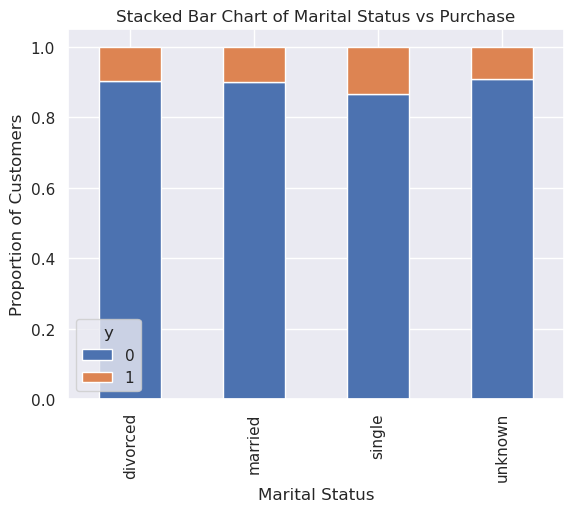

In [36]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True).plot(kind="bar", stacked=True)
plt.title("Stacked Bar Chart of Marital Status vs Purchase")
plt.xlabel("Marital Status")
plt.ylabel("Proportion of Customers")
plt.show()

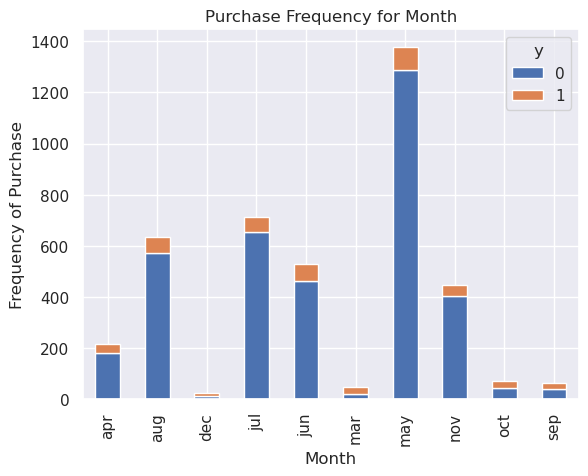

In [37]:
table = pd.crosstab(data.month, data.y)
table.plot(kind="bar", stacked=True)
plt.title("Purchase Frequency for Month")
plt.xlabel("Month")
plt.ylabel("Frequency of Purchase")
plt.show()


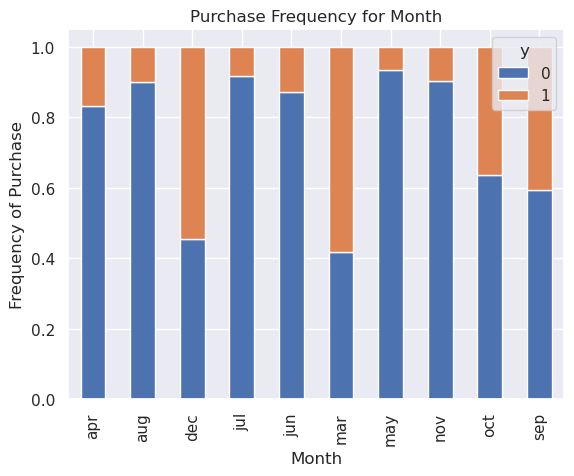

In [38]:
table = pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Purchase Frequency for Month")
plt.xlabel("Month")
plt.ylabel("Frequency of Purchase")
plt.show()


In [21]:
categories = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
for category in categories:
    cat_list = "cat" + "_" + category
    cat_dummies = pd.get_dummies(data[category], prefix=category)
    data_new = data.join(cat_dummies)
    data = data_new

In [22]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_Basic',
       'education_High School', 'education_Illiterate',
       'education_Professional Course', 'education_University Degree',
       'education_Unknown', 'default_no', 'default_unknown',
       'default_yes', 'housing_no', 'housing_unknown', 'housing_yes',
       'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec',
 

In [23]:
data_vars = data.columns.values.tolist()
to_keep = [column for column in data_vars if column not in categories]
banked_data = data[to_keep]

In [24]:
banked_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [25]:
y = banked_data["y"]
X = banked_data.drop("y", axis=1)

In [26]:
n = 12

In [27]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [33]:
model = LogisticRegression(max_iter=100000)

In [34]:
rfe = RFE(model, n_features_to_select=n)
rfe = rfe.fit(X, y)

In [35]:
rfe.support_

array([False, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True, False,  True, False, False,
       False, False, False, False,  True, False,  True])

In [36]:
rfe.ranking_

array([39, 46, 19, 50,  1, 16, 31, 24,  1, 43, 23,  3,  1, 44,  2, 42,  1,
        5, 38, 35, 14,  9, 20, 37, 34, 40, 32, 15, 12, 22, 36, 10, 28, 27,
       48, 11,  7, 30, 17, 21, 45, 18,  4,  6, 47,  1,  1,  1,  1,  1,  8,
        1, 33, 41, 26, 49, 29, 13,  1, 25,  1])

In [38]:
banked_vars = banked_data.columns.values.tolist()

In [39]:
zip_vars = zip(banked_vars, rfe.support_, rfe.ranking_)
zip_vars = list(zip_vars)
print(zip_vars)

[('age', False, 39), ('duration', False, 46), ('campaign', False, 19), ('pdays', False, 50), ('previous', True, 1), ('emp.var.rate', False, 16), ('cons.price.idx', False, 31), ('cons.conf.idx', False, 24), ('euribor3m', True, 1), ('nr.employed', False, 43), ('y', False, 23), ('job_admin.', False, 3), ('job_blue-collar', True, 1), ('job_entrepreneur', False, 44), ('job_housemaid', False, 2), ('job_management', False, 42), ('job_retired', True, 1), ('job_self-employed', False, 5), ('job_services', False, 38), ('job_student', False, 35), ('job_technician', False, 14), ('job_unemployed', False, 9), ('job_unknown', False, 20), ('marital_divorced', False, 37), ('marital_married', False, 34), ('marital_single', False, 40), ('marital_unknown', False, 32), ('education_Basic', False, 15), ('education_High School', False, 12), ('education_Illiterate', False, 22), ('education_Professional Course', False, 36), ('education_University Degree', False, 10), ('education_Unknown', False, 28), ('default_n

In [40]:
cols = [column for column, support, _ in zip_vars if support]

In [41]:
x = banked_data[cols]
y = banked_data["y"]

In [52]:
x

,previous,euribor3m,job_blue-collar,job_retired,month_aug,month_dec,month_jul,month_jun,month_mar,month_nov,day_of_week_wed,poutcome_nonexistent
0,0,1.313,True,False,False,False,False,False,False,False,False,True
1,0,4.855,False,False,False,False,False,False,False,False,False,True
2,0,4.962,False,False,False,False,False,True,False,False,True,True
3,0,4.959,False,False,False,False,False,True,False,False,False,True
4,0,4.191,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4114,0,4.958,False,False,False,False,True,False,False,False,False,True
4115,0,4.959,False,False,False,False,True,False,False,False,False,True
4116,1,1.354,False,False,False,False,False,False,False,False,False,False
4117,0,4.966,False,False,True,False,False,False,False,False,False,True


In [53]:
model = LogisticRegression(max_iter=100000)
model.fit(x, y)

LogisticRegression(max_iter=100000)

In [55]:
print(model.score(x, y))

0.8958485069191552


In [57]:
print(model.coef_)

[[ 0.53620269 -0.54445167 -0.35341869  0.36635911  0.62889465  1.19229095
   0.95883371  1.05464275  1.64341797  0.45509216  0.04703695  0.35749471]]
